In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nsepython import equity_history
from datetime import datetime
from dateutil.relativedelta import relativedelta
from prophet import Prophet
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [5]:
# Calculating Time Period
symbol = 'SBIN'
series = 'EQ'
end_date = datetime.today().strftime('%d-%m-%Y')
start_date = (datetime.today() - relativedelta(years=15)).strftime('%d-%m-%Y')

In [6]:
# Fetch Stock Price Data
data = equity_history(symbol=symbol, series=series, start_date=start_date, end_date=end_date)

C:\Users\alokp\anaconda3\Lib\site-packages\nsepython\rahu.py:611: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  total = pd.concat([total, equity_history_virgin(symbol, series, start_date, temp_date)])


In [7]:
df = pd.DataFrame(data)
df.head()

,_id,CH_SYMBOL,CH_SERIES,CH_MARKET_TYPE,CH_TRADE_HIGH_PRICE,CH_TRADE_LOW_PRICE,CH_OPENING_PRICE,CH_CLOSING_PRICE,CH_LAST_TRADED_PRICE,CH_PREVIOUS_CLS_PRICE,...,CH_ISIN,CH_TIMESTAMP,TIMESTAMP,createdAt,updatedAt,__v,SLBMH_TOT_VAL,VWAP,mTIMESTAMP,CA
0,6908970bc1e397ad87c576be,SBIN,EQ,N,953.40,937.5,938.75,949.70,948.60,937.00,...,INE062A01020,2025-11-03,2025-11-02T18:30:00.000Z,2025-11-03T11:50:35.186Z,2025-11-03T11:50:35.186Z,0,None,948.05,03-Nov-2025,NaN
1,6909e88a66f1902bc3a5abfb,SBIN,EQ,N,959.30,941.5,951.00,957.60,954.60,949.70,...,INE062A01020,2025-11-04,2025-11-03T18:30:00.000Z,2025-11-04T11:50:34.932Z,2025-11-04T11:50:34.932Z,0,None,951.24,04-Nov-2025,NaN
2,690c8b8b20f15f6ac5899e18,SBIN,EQ,N,971.40,955.3,969.65,960.75,959.85,957.60,...,INE062A01020,2025-11-06,2025-11-05T18:30:00.000Z,2025-11-06T11:50:35.632Z,2025-11-06T11:50:35.632Z,0,None,962.26,06-Nov-2025,NaN
3,690ddd0b9168790cdff99881,SBIN,EQ,N,964.85,944.0,958.75,955.85,954.80,960.75,...,INE062A01020,2025-11-07,2025-11-06T18:30:00.000Z,2025-11-07T11:50:35.625Z,2025-11-07T11:50:35.625Z,0,None,955.55,07-Nov-2025,NaN
4,6911f4b2cca2582e2829404e,SBIN,EQ,N,963.20,949.1,956.00,951.15,950.55,955.85,...,INE062A01020,2025-11-10,2025-11-09T18:30:00.000Z,2025-11-10T14:20:34.566Z,2025-11-10T14:20:34.566Z,0,None,952.71,10-Nov-2025,NaN


In [8]:
name = f'{symbol}-{start_date}-{end_date}.csv'
df.to_csv(name, index=False)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3826 entries, 0 to 3825
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    3826 non-null   object 
 1   CH_SYMBOL              3826 non-null   object 
 2   CH_SERIES              3826 non-null   object 
 3   CH_MARKET_TYPE         3826 non-null   object 
 4   CH_TRADE_HIGH_PRICE    3826 non-null   float64
 5   CH_TRADE_LOW_PRICE     3826 non-null   float64
 6   CH_OPENING_PRICE       3826 non-null   float64
 7   CH_CLOSING_PRICE       3826 non-null   float64
 8   CH_LAST_TRADED_PRICE   3826 non-null   float64
 9   CH_PREVIOUS_CLS_PRICE  3826 non-null   float64
 10  CH_TOT_TRADED_QTY      3826 non-null   int64  
 11  CH_TOT_TRADED_VAL      3826 non-null   float64
 12  CH_52WEEK_HIGH_PRICE   3826 non-null   float64
 13  CH_52WEEK_LOW_PRICE    3826 non-null   float64
 14  CH_TOTAL_TRADES        3706 non-null   float64
 15  CH_I

In [10]:
df['CH_TIMESTAMP'] = pd.to_datetime(df['CH_TIMESTAMP'])
df = df.drop(columns=['_id', 'CH_SYMBOL', 'CH_SERIES','CH_MARKET_TYPE', 'CH_52WEEK_HIGH_PRICE', 'CH_52WEEK_LOW_PRICE', 'CH_ISIN', 'TIMESTAMP', 'createdAt', 'updatedAt', '__v', 'SLBMH_TOT_VAL', 'mTIMESTAMP'])
df.head()

,CH_TRADE_HIGH_PRICE,CH_TRADE_LOW_PRICE,CH_OPENING_PRICE,CH_CLOSING_PRICE,CH_LAST_TRADED_PRICE,CH_PREVIOUS_CLS_PRICE,CH_TOT_TRADED_QTY,CH_TOT_TRADED_VAL,CH_TOTAL_TRADES,CH_TIMESTAMP,VWAP,CA
0,953.40,937.5,938.75,949.70,948.60,937.00,11744735,1.113461e+10,257905.0,2025-11-03,948.05,NaN
1,959.30,941.5,951.00,957.60,954.60,949.70,19154518,1.822051e+10,274272.0,2025-11-04,951.24,NaN
2,971.40,955.3,969.65,960.75,959.85,957.60,23088096,2.221667e+10,295608.0,2025-11-06,962.26,NaN
3,964.85,944.0,958.75,955.85,954.80,960.75,13371323,1.277701e+10,213279.0,2025-11-07,955.55,NaN
4,963.20,949.1,956.00,951.15,950.55,955.85,7343249,6.995981e+09,152876.0,2025-11-10,952.71,NaN


In [11]:
df.isnull().sum()

CH_TRADE_HIGH_PRICE         0
CH_TRADE_LOW_PRICE          0
CH_OPENING_PRICE            0
CH_CLOSING_PRICE            0
CH_LAST_TRADED_PRICE        0
CH_PREVIOUS_CLS_PRICE       0
CH_TOT_TRADED_QTY           0
CH_TOT_TRADED_VAL           0
CH_TOTAL_TRADES           120
CH_TIMESTAMP                0
VWAP                        0
CA                       3811
dtype: int64

In [12]:
df['CH_TOTAL_TRADES'] = df['CH_TOTAL_TRADES'].interpolate(method='linear')
df.isnull().sum()

CH_TRADE_HIGH_PRICE         0
CH_TRADE_LOW_PRICE          0
CH_OPENING_PRICE            0
CH_CLOSING_PRICE            0
CH_LAST_TRADED_PRICE        0
CH_PREVIOUS_CLS_PRICE       0
CH_TOT_TRADED_QTY           0
CH_TOT_TRADED_VAL           0
CH_TOTAL_TRADES             0
CH_TIMESTAMP                0
VWAP                        0
CA                       3811
dtype: int64

### Visulazing Data

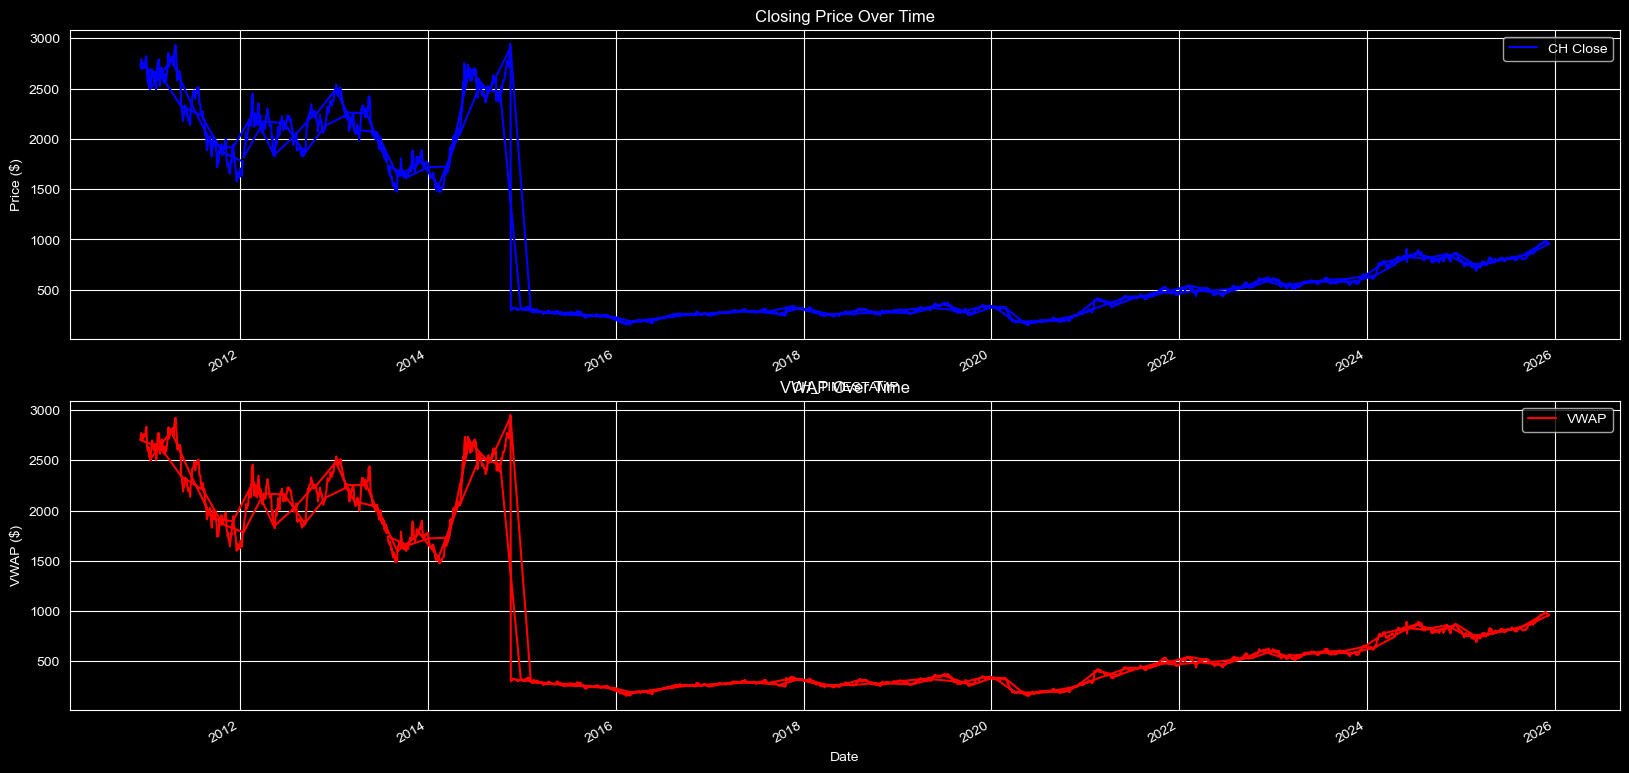

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))

df.plot(x='CH_TIMESTAMP', y='CH_CLOSING_PRICE',ax=ax[0], color='blue', label='CH Close')
ax[0].set_title('Closing Price Over Time')
ax[0].set_ylabel('Price ($)')
ax[0].legend()

df.plot(x='CH_TIMESTAMP', y='VWAP',ax=ax[1], color='red', label='VWAP')
ax[1].set_title('VWAP Over Time')
ax[1].set_ylabel('VWAP ($)')
ax[1].set_xlabel('Date')
ax[1].legend()

plt.show()

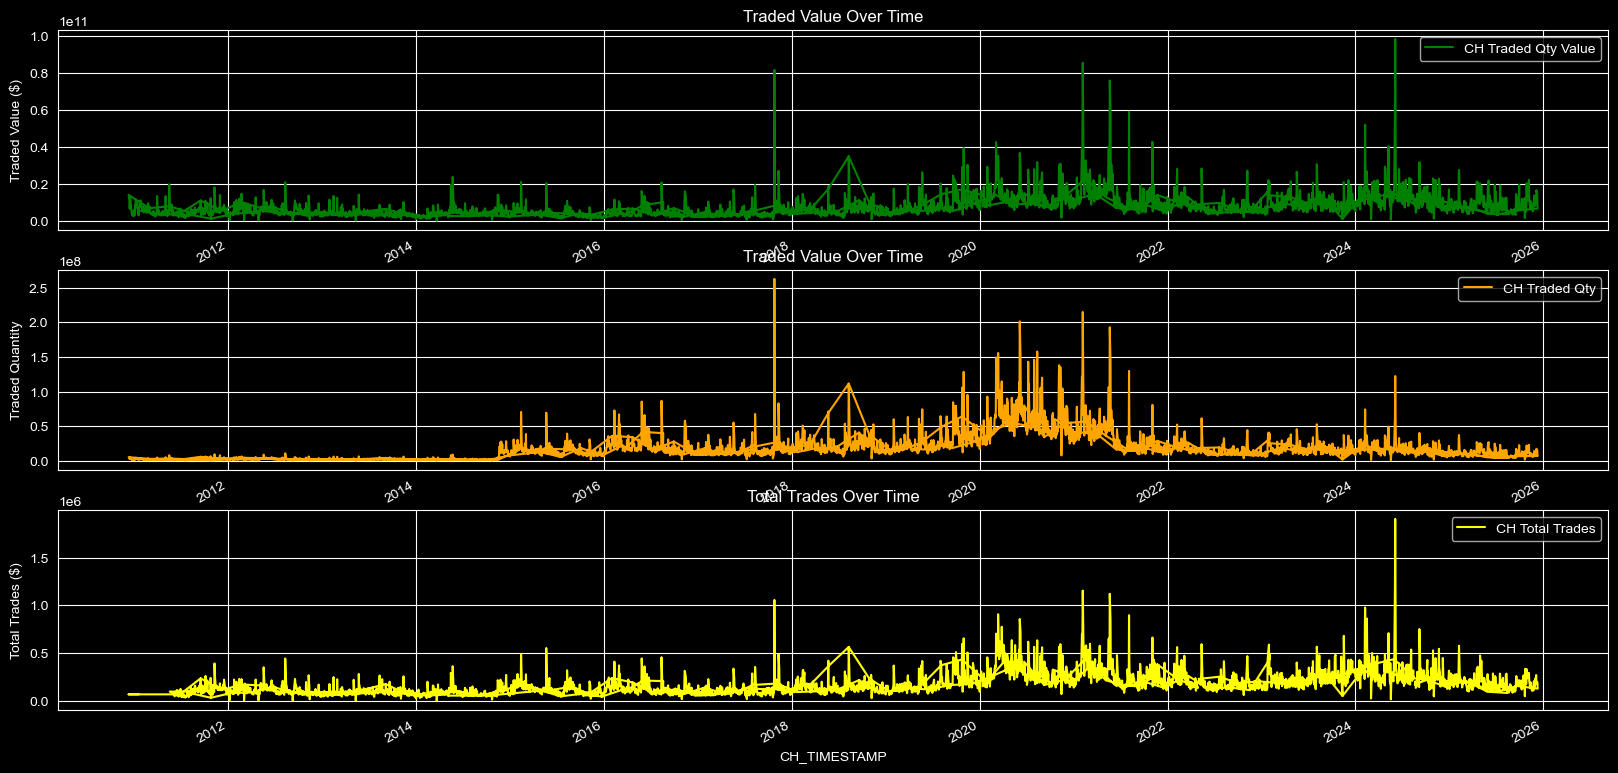

In [14]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 10))

df.plot(x='CH_TIMESTAMP', y='CH_TOT_TRADED_VAL',ax=ax[0], color='green', label='CH Traded Qty Value')
ax[0].set_title('Traded Value Over Time')
ax[0].set_ylabel('Traded Value ($)')
ax[0].legend()

df.plot(x='CH_TIMESTAMP', y='CH_TOT_TRADED_QTY',ax=ax[1], color='orange', label='CH Traded Qty')
ax[1].set_title('Traded Value Over Time')
ax[1].set_ylabel('Traded Quantity')
ax[1].legend()

df.plot(x='CH_TIMESTAMP', y='CH_TOTAL_TRADES',ax=ax[2], color='yellow', label='CH Total Trades')
ax[2].set_title('Total Trades Over Time')
ax[2].set_ylabel('Total Trades ($)')
ax[2].legend()

plt.show()

### Building Model

In [15]:
# Step 1: Renaming columns CH_TIMESTAMP -> ds, CH_CLOSING_PRICE -> y
df = df.rename(columns={'CH_TIMESTAMP': 'ds','CH_CLOSING_PRICE': 'y'})
df.head()

,CH_TRADE_HIGH_PRICE,CH_TRADE_LOW_PRICE,CH_OPENING_PRICE,y,CH_LAST_TRADED_PRICE,CH_PREVIOUS_CLS_PRICE,CH_TOT_TRADED_QTY,CH_TOT_TRADED_VAL,CH_TOTAL_TRADES,ds,VWAP,CA
0,953.40,937.5,938.75,949.70,948.60,937.00,11744735,1.113461e+10,257905.0,2025-11-03,948.05,NaN
1,959.30,941.5,951.00,957.60,954.60,949.70,19154518,1.822051e+10,274272.0,2025-11-04,951.24,NaN
2,971.40,955.3,969.65,960.75,959.85,957.60,23088096,2.221667e+10,295608.0,2025-11-06,962.26,NaN
3,964.85,944.0,958.75,955.85,954.80,960.75,13371323,1.277701e+10,213279.0,2025-11-07,955.55,NaN
4,963.20,949.1,956.00,951.15,950.55,955.85,7343249,6.995981e+09,152876.0,2025-11-10,952.71,NaN


In [16]:
train_length = int(len(df) * 0.8)
train, test = df[:train_length], df[train_length:]

In [17]:
model = Prophet(daily_seasonality=True, seasonality_mode='multiplicative')
model.fit(train[['ds', 'y', 'CH_TRADE_HIGH_PRICE', 'CH_TRADE_LOW_PRICE', 'CH_OPENING_PRICE']])
future = model.make_future_dataframe(periods=365, freq='D')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower','yhat_upper']].tail(20)

,ds,yhat,yhat_lower,yhat_upper
3315,2026-11-21,1027.493167,18.415504,2016.819623
3316,2026-11-22,773.048302,-6.971248,1503.291897
3317,2026-11-23,992.156216,12.439031,1892.823380
3318,2026-11-24,966.088929,20.113982,1877.562718
3319,2026-11-25,944.504372,-3.755050,1827.268137
3320,2026-11-26,906.770279,5.502304,1794.851090
3321,2026-11-27,887.586072,9.274672,1725.849333
3322,2026-11-28,853.297401,-17.144672,1660.846735
3323,2026-11-29,608.515433,-15.166721,1195.310906
3324,2026-11-30,840.073299,2.253726,1671.428419


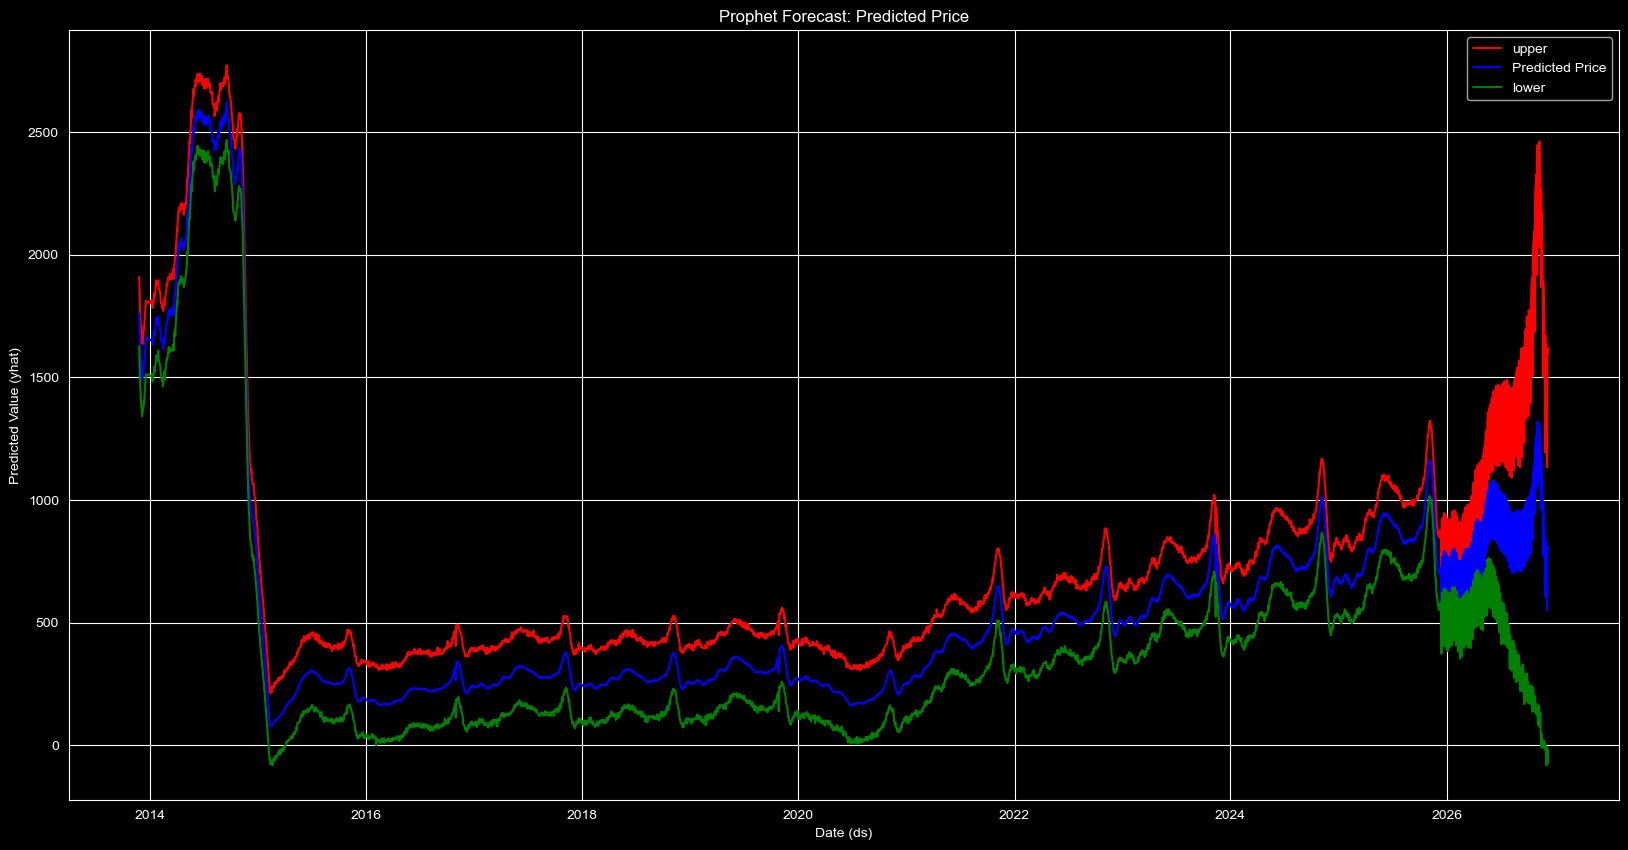

In [18]:
plt.figure(figsize=(20, 10))
plt.plot(forecast['ds'], forecast['yhat_upper'], color='red', label='upper')
plt.plot(forecast['ds'],forecast['yhat'],color='blue',label='Predicted Price')
plt.plot(forecast['ds'],forecast['yhat_lower'],color='green', label='lower')
plt.title('Prophet Forecast: Predicted Price')
plt.xlabel('Date (ds)')
plt.ylabel('Predicted Value (yhat)')
plt.legend()
plt.show()

In [19]:
# Measuring Accuracy

y_true = test['y']
y_pred = forecast['yhat'].iloc[-len(test):].values

mae = mean_absolute_error(y_true, y_pred)
rmse = sqrt(mean_squared_error(y_true, y_pred))
mape = (abs((y_true - y_pred) / y_true).mean()) * 100

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape, "%")


MAE: 1288.2064066199387
RMSE: 1323.7905540282272
MAPE: 59.65299256831978 %
